In [1]:
import numpy as np
import pandas as pd

In [3]:
df  = pd.read_csv('spam.csv',encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [ ]:
# 1 Data Cleaning 
# 2 EDA
# 3 Text Preprocessing
# 4 Model Building
# 5 Evaluation 
# 6 Improvement
# 7 Website 
# 8 Deploy

# 1. Data Cleaning


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# Drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [12]:
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [17]:
df.target.unique()

array(['ham', 'spam'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
df['target'] = encoder.fit_transform(df['target'])

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [25]:
# duplicate values
df.duplicated().sum()

403

In [28]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [29]:
df.duplicated().sum()

0

In [31]:
df.shape

(5169, 2)

## 2. EDA

In [32]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7f7f74973760>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'Not Spam'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

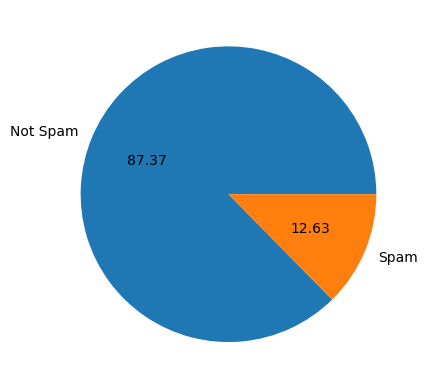

In [36]:
# pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['Not Spam', 'Spam'], autopct="%0.2f")

In [ ]:
# Data is imbalanced

In [37]:
import nltk

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anuppatankar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
df['num_charaters'] = df['text'].apply(len)

In [41]:
df.head()

,target,text,num_charaters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [43]:
# number of words in every text
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [44]:
df.head(3)

,target,text,num_charaters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [45]:
# number of sentences in every text
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [46]:
df.head(3)

,target,text,num_charaters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [48]:
# get the summary of the columns
df[['num_charaters','num_words','num_sentences']].describe()

,num_charaters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [52]:
# describe where target is 0
df[df['target']==0][['num_charaters','num_words','num_sentences']].describe()

,num_charaters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [53]:
# describe where target is 1
df[df['target']==1][['num_charaters','num_words','num_sentences']].describe()

,num_charaters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [54]:
import seaborn as sns

In [55]:
df[df['target']==0]['num_charaters']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_charaters, Length: 4516, dtype: int64

<AxesSubplot:xlabel='num_charaters', ylabel='Count'>

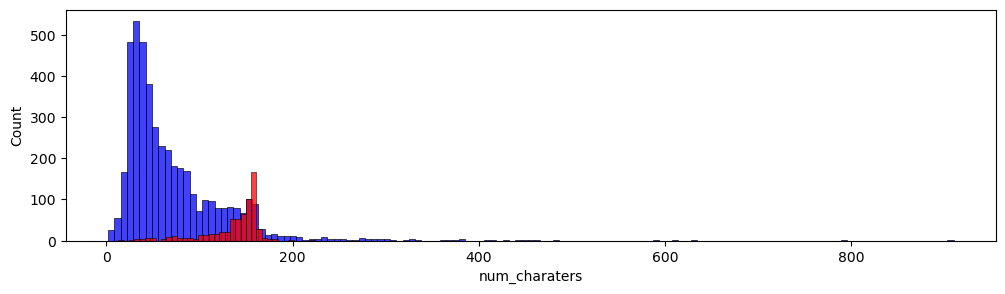

In [61]:
# See the number of characters in spam and not spam
plt.figure(figsize=(12,3))
sns.histplot(df[df['target']==0]['num_charaters'],color='blue')
sns.histplot(df[df['target']==1]['num_charaters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

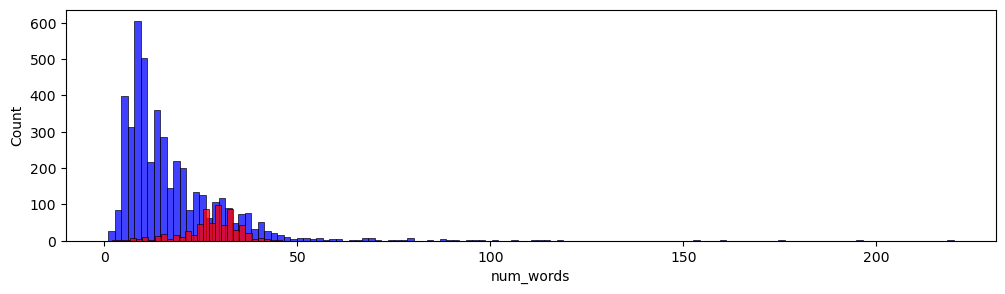

In [62]:
# See the number of words in spam and not spam
plt.figure(figsize=(12,3))
sns.histplot(df[df['target']==0]['num_words'],color='blue')
sns.histplot(df[df['target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

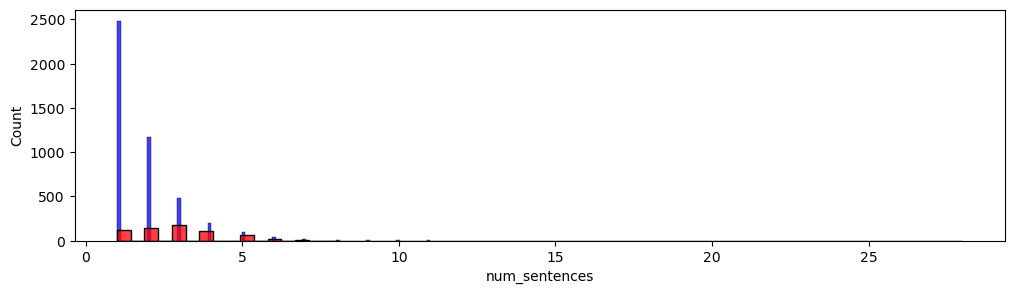

In [64]:
# See the number of sentences in spam and not spam 
# we dont get much details with num of sentences hence we use words and characters
plt.figure(figsize=(12,3))
sns.histplot(df[df['target']==0]['num_sentences'],color='blue')
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

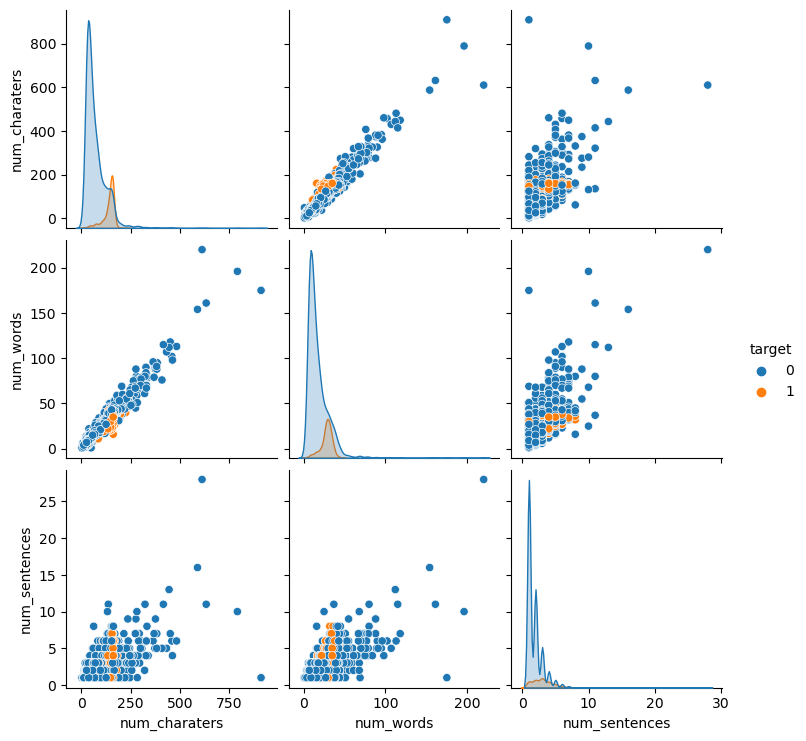

In [66]:
sns.pairplot(df,hue='target')

In [67]:
df.corr()

,target,num_charaters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_charaters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

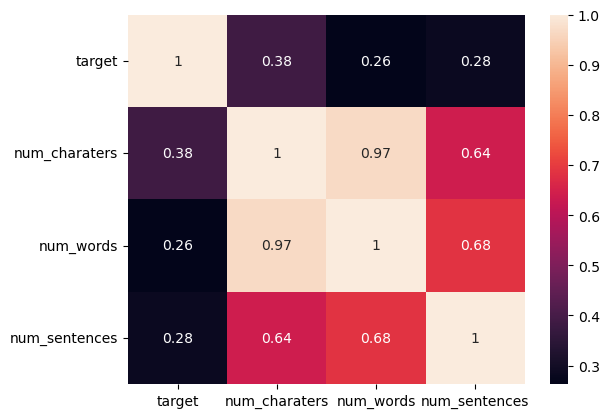

In [68]:
sns.heatmap(df.corr(),annot=True)

In [69]:
# we can see the there is multi collinearity among the variables 
# also we will take the feature which is affecting the most to the target variable that is num of characters 

## 3. Data Preprocessing 
### Lower case
### Tokenization
### Removing Special Characters
### Removing Stop words and punctuations
### Stemming 

In [81]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [82]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anuppatankar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [91]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [92]:
ps.stem('dances')

'danc'

In [93]:
ps.stem('dancing')

'danc'

In [99]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) # returns a list of words from sentences
    new_text = []
    for word in text:
        if word.isalnum(): # removes special characters 
            new_text.append(word)
            
    text = new_text[:]
    new_text.clear()
    
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            new_text.append(word)
            
    text = new_text[:]
    new_text.clear()
    
    for word in text:
        new_text.append(ps.stem(word))
    
    return " ".join(new_text)

In [101]:
transform_text("Hii How are you @@ 20% new * dance dancing")

'hii 20 new danc danc'

In [102]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [103]:
transform_text("But i'll b going 2 sch on mon. My sis need 2 take smth.")

'b go 2 sch mon si need 2 take smth'

In [105]:
df['transformed_text'] = df['text'].apply(transform_text)

In [106]:
df.head()

,target,text,num_charaters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [109]:
# make word cloud
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.9 MB/s eta 0:00:00a 0:00:01


In [118]:
from wordcloud import WordCloud
wc = WordCloud(width=900, height=900, min_font_size=10, background_color='white')

In [119]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

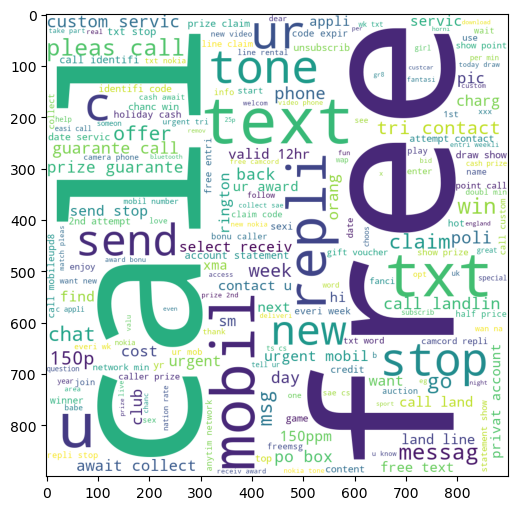

In [123]:
plt.figure(figsize=(9,6))
plt.imshow(spam_wc)

In [124]:
not_spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

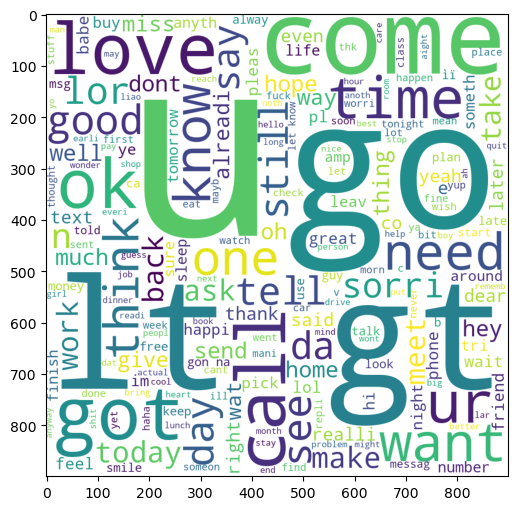

In [125]:
plt.figure(figsize=(9,6))
plt.imshow(not_spam_wc)

In [126]:
df.head()

,target,text,num_charaters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [134]:
# get the text where target is 1
# then change it to list
# now append the words in the list to spam corpus
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        


In [135]:
len(spam_corpus)

9939

In [139]:
# this will take a list and make a dictionary with word and its frequency
from collections import Counter
spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


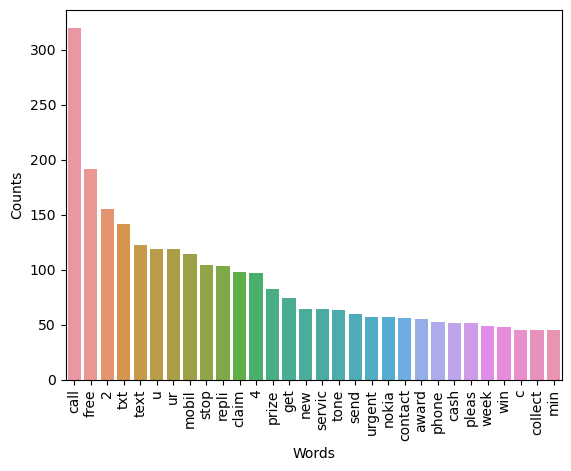

In [144]:
sns.barplot(spam_words[0],spam_words[1])
plt.xlabel("Words")
plt.ylabel("Counts")
plt.xticks(rotation='vertical')
plt.show()

In [145]:
not_spam_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)

In [146]:
len(not_spam_corpus)

35394

In [147]:
not_spam_words = pd.DataFrame(Counter(not_spam_corpus).most_common(30))

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


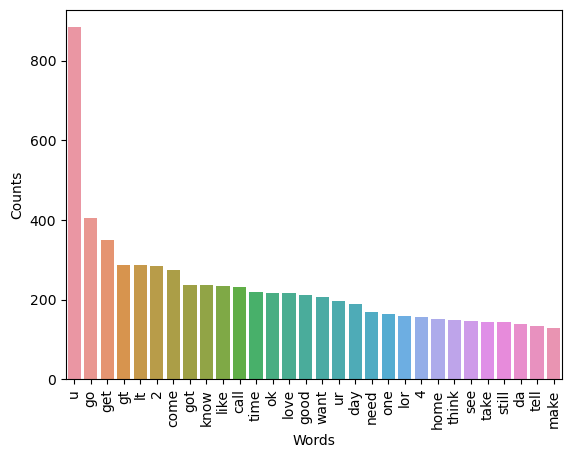

In [148]:
sns.barplot(not_spam_words[0],not_spam_words[1])
plt.xlabel("Words")
plt.ylabel("Counts")
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [238]:
# vectorizer bag of words tf idf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [265]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
# X = scaler.fit_transform(X)

In [266]:
X.shape

(5169, 3000)

In [267]:
y = df['target'].values

In [268]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [269]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [271]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [272]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [273]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [274]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [275]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [276]:
# Using tfidf with mnb because it has most precision 

In [277]:
# using other models for comparison

In [278]:
!pip install xgboost

In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [280]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [281]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'Adaboost':abc,
    'BGC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [282]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [283]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [284]:
accuracy_scores = []
precision_scores  = []

In [285]:
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy ",current_accuracy)
    print("Precision ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy  0.9758220502901354
Precision  0.9747899159663865


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy  0.9052224371373307
Precision  1.0
For  NB
Accuracy  0.9709864603481625
Precision  1.0
For  DT
Accuracy  0.9294003868471954
Precision  0.8282828282828283
For  LR
Accuracy  0.9584139264990329
Precision  0.9702970297029703
For  RF
Accuracy  0.9748549323017408
Precision  0.9827586206896551
For  Adaboost
Accuracy  0.960348162475822
Precision  0.9292035398230089
For  BGC
Accuracy  0.9574468085106383
Precision  0.8671875
For  ETC
Accuracy  0.9748549323017408
Precision  0.9745762711864406
For  GBDT
Accuracy  0.9477756286266924
Precision  0.92
For  XGB
Accuracy  0.971953578336557
Precision  0.943089430894309


In [286]:
performance_df = pd.DataFrame({'Algorithms':clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values('Precision',ascending=False)

In [287]:
performance_df

,Algorithms,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,XGB,0.971954,0.943089
6,Adaboost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BGC,0.957447,0.867188


In [288]:
performance_df1 = pd.melt(performance_df,id_vars='Algorithms')

In [289]:
performance_df1

,Algorithms,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,XGB,Accuracy,0.971954
7,Adaboost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BGC,Accuracy,0.957447


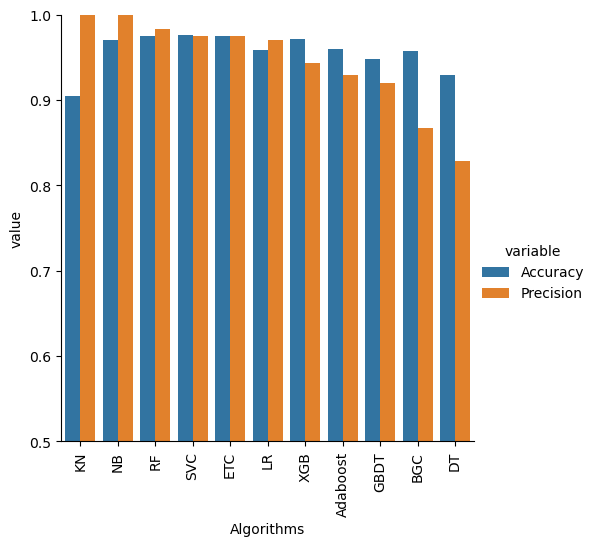

In [290]:
sns.catplot(x='Algorithms', y='value', hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [291]:
# improving model
# changed the max features to 3000 in tfidf
# used minmax scaler but it didnt worked well
# we can also used VotingClassifier but it didnt work for me

In [292]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))